In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from os import system, listdir
from tqdm import tqdm

In [21]:
for f in listdir('morph'):
    system(f"ffmpeg -hide_banner -loglevel error -i morph/{f} /shared/morph/{f}")

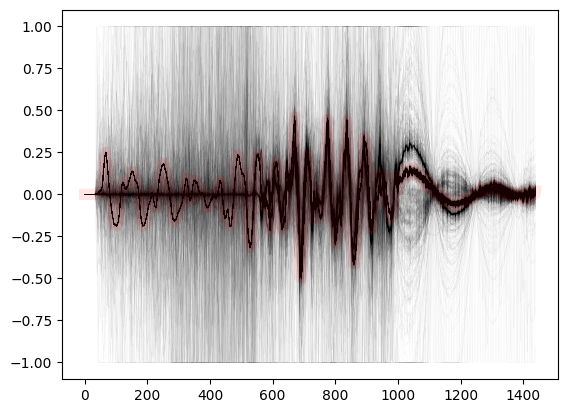

In [2]:
fs, data = wavfile.read(f'samples_ffmpegged/bitflip_{10}.wav')
data = data.astype(float) / 32768

window_size = 1440 * 4
original = data[:window_size]
copies = data[window_size * 3:]
copies.resize((len(copies) // window_size,  window_size))


for line in copies:
    plt.plot(line[:1440], alpha=0.05,linewidth=0.3, color='black')

plt.plot(original[:1440], color='red', linewidth=8, alpha=0.1)


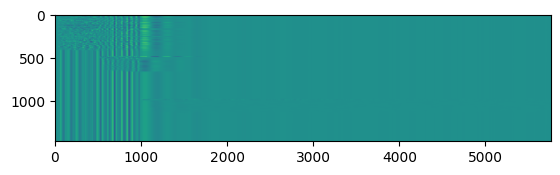

In [4]:
fs, data = wavfile.read(f'samples_ffmpegged/bitflip_{10}.wav')
data = data.astype(float) / 32768

window_size = 1440 * 4
original = data[:window_size]
copies = data[window_size * 3:]
copies.resize((len(copies) // window_size,  window_size))
plt.imshow(copies)

Text(0, 0.5, 'index of the frame when sorted from \nleast to most similar to original')

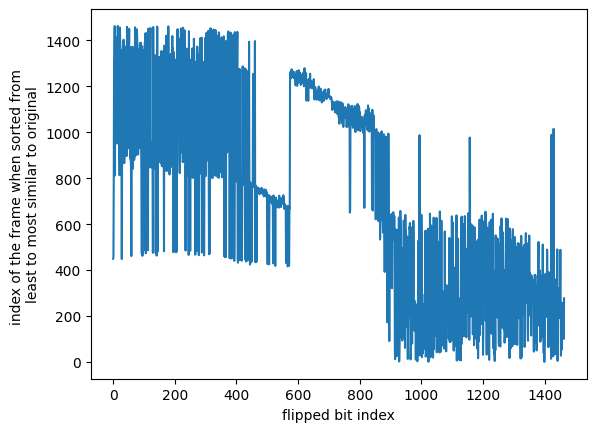

In [15]:
x = [i for i in range(len(copies))]
y = [i for i in range(len(copies))]

diffs = np.sum(abs(copies - original), axis=1)

def sortkey(i):
    return diffs[i]

y.sort(key=sortkey)
plt.plot(x,y)
plt.xlabel("flipped bit index")
plt.ylabel("index of the frame when sorted from \nleast to most similar to original")

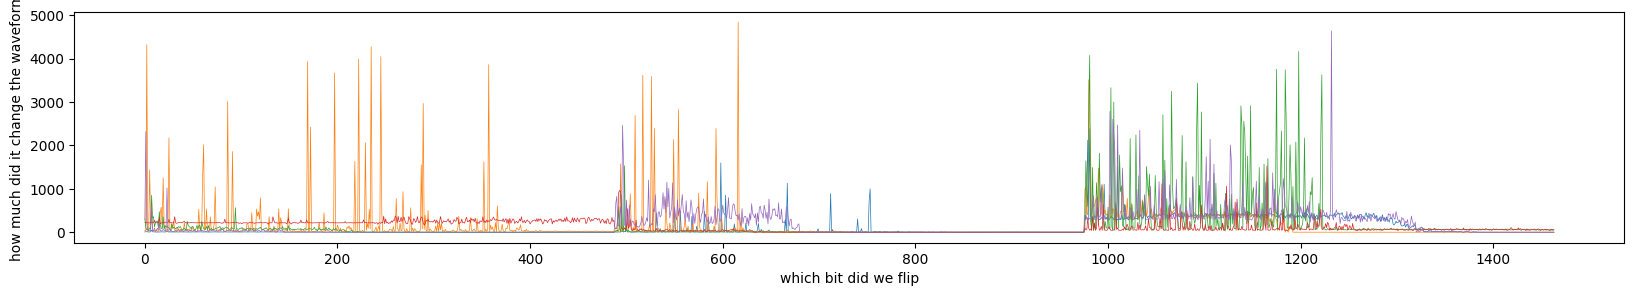

In [23]:
plt.xlabel("which bit did we flip")
plt.ylabel("how much did it change the waveform")
for i in range(5):
    fs, data = wavfile.read(f'samples_ffmpegged/bitflip_{i}.wav')
    data = data.astype(float) / 32768
    
    window_size = 1440 * 4
    original = data[:window_size]
    copies = data[window_size * 3:]
    copies.resize((len(copies) // window_size,  window_size))
    
    diffs = copies - original
    plt.plot(np.sum(abs(diffs), axis=1), alpha=1,linewidth=0.5)

In [21]:
print(copies)

None


100%|█████████████████████████████████████████| 500/500 [00:27<00:00, 17.86it/s]


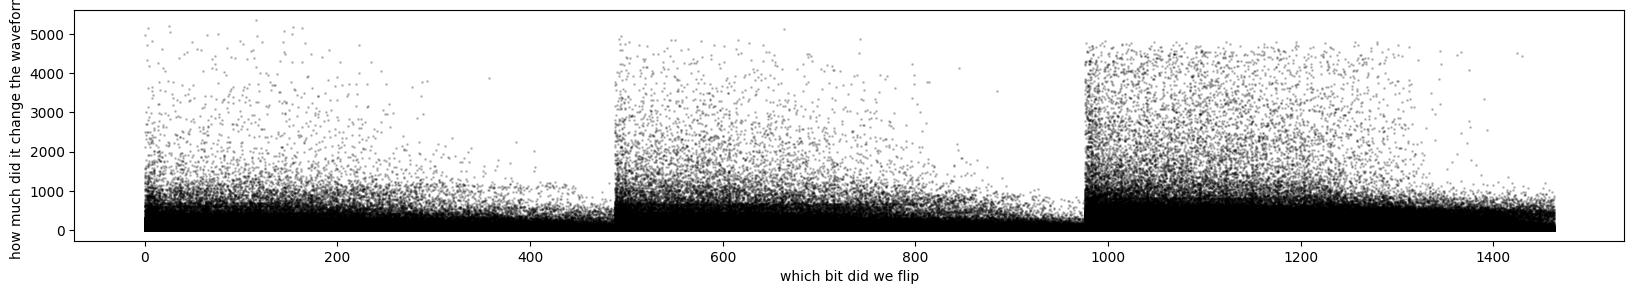

In [24]:
plt.xlabel("which bit did we flip")
plt.ylabel("how much did it change the waveform")

for i in tqdm(range(500)):
    fs, data = wavfile.read(f'samples_ffmpegged/bitflip_{i}.wav')
    data = data.astype(float) / 32768
    window_size = 1440 * 4
    original = data[:window_size]
    copies = data[window_size * 3:]
    copies.resize((len(copies) // window_size,  window_size))
    diffs = copies - original
    x = [i for i in range(len(diffs))]
    plt.scatter(x, np.sum(abs(diffs), axis=1), color="black", alpha=0.2, s=1)